# Install libraries 

In [1]:
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier

# Read the Excel file into a Pandas DataFrame

In [2]:
# Read the Excel file into a Pandas DataFrame
df = pd.read_excel('IoT-23_Dataset_details.xlsx')

# Write the DataFrame to a CSV file
df.to_csv('IoT22.csv', index=False)


# Examine the dataframe

In [3]:
df.head()

,#,Name of Dataset,Duration(hrs),#Packets,#ZeekFlows,Pcap Size,Name
0,1,CTU-IoT-Malware-Capture-34-1,24,233000,23146,121 MB,Mirai
1,2,CTU-IoT-Malware-Capture-43-1,1,82000000,67321810,6 GB,Mirai
2,3,CTU-IoT-Malware-Capture-44-1,2,1309000,238,1.7 GB,Mirai
3,4,CTU-IoT-Malware-Capture-49-1,8,18000000,5410562,1.3 GB,Mirai
4,5,CTU-IoT-Malware-Capture-52-1,24,64000000,19781379,4.6 GB,Mirai


In [4]:

data = pd.read_csv("iot23_combined.csv")

In [5]:
data.head()

,Unnamed: 0,ts,id.orig_h,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,0,1.540470e+09,192.168.1.132,0.003497,0,0,0.0,5.0,212.0,3.0,...,0,0,0,0,0,0,0,1,0,0
1,1,1.540470e+09,192.168.1.132,0.036724,34,311,0.0,1.0,62.0,1.0,...,0,0,0,0,0,0,0,1,0,0
2,2,1.540469e+09,192.168.1.132,384.518261,15072,0,0.0,48.0,16416.0,0.0,...,0,0,0,1,0,0,0,0,0,0
3,3,1.540470e+09,192.168.1.132,0.270332,48,48,0.0,1.0,76.0,1.0,...,0,0,0,0,0,0,0,1,0,0
4,4,1.540470e+09,192.168.1.132,0.111429,48,48,0.0,1.0,76.0,1.0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
data.columns

Index(['Unnamed: 0', 'ts', 'id.orig_h', 'duration', 'orig_bytes', 'resp_bytes',
       'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts',
       'resp_ip_bytes', 'label', 'proto_icmp', 'proto_tcp', 'proto_udp',
       'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO',
       'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH',
       'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3',
       'conn_state_SF', 'conn_state_SH', 'conn_state_SHR'],
      dtype='object')

# Show the unique values of the type of attacks

In [7]:
data.label.unique()

array(['Benign', 'PartOfAHorizontalPortScan', 'Okiru', 'DDoS',
       'C&C-HeartBeat', '-   Benign   -', 'C&C-Torii', 'C&C', 'Attack',
       'C&C-FileDownload', 'FileDownload', 'C&C-HeartBeat-FileDownload',
       'C&C-Mirai'], dtype=object)

# Count the frequencies of the type of attack

In [8]:
data['label'].value_counts()

PartOfAHorizontalPortScan     825939
Okiru                         262690
-   Benign   -                146275
DDoS                          138777
Benign                         53481
C&C                            15100
Attack                          3915
C&C-HeartBeat                    349
C&C-FileDownload                  43
C&C-Torii                         30
FileDownload                      13
C&C-HeartBeat-FileDownload         8
C&C-Mirai                          1
Name: label, dtype: int64

# Plot the frequencies of every type of attack

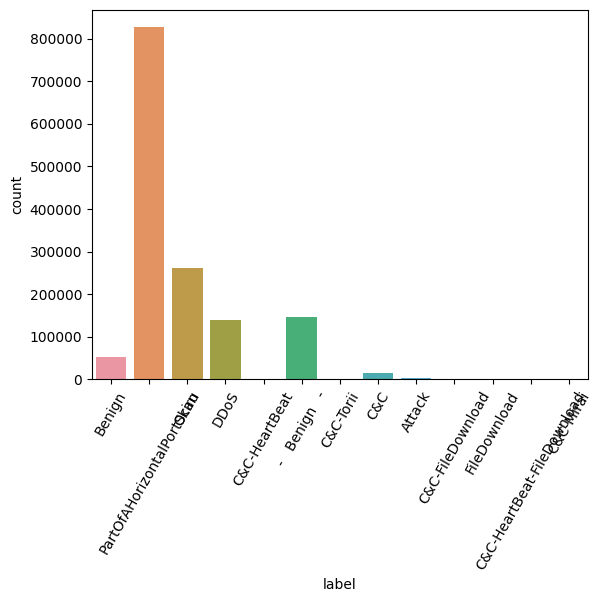

In [9]:


sns.countplot(x='label', data=data)
plt.xticks(rotation=60)
plt.show()


## Clean the data

In [10]:


data['label'].replace({'-   Benign   -': 'Benign', 'Benign ': 'Benign'}, inplace=True)


In [11]:
data.label.unique()

array(['Benign', 'PartOfAHorizontalPortScan', 'Okiru', 'DDoS',
       'C&C-HeartBeat', 'C&C-Torii', 'C&C', 'Attack', 'C&C-FileDownload',
       'FileDownload', 'C&C-HeartBeat-FileDownload', 'C&C-Mirai'],
      dtype=object)

# Building The Classification Models

#### Classification models(Support Vector machine & Naive Bayes)

# Support Vector machine (SVM)

### Reshape the dataframe

In [37]:
filepath = "iot23_combined.csv"
data = pd.read_csv(filepath)
SVM = pd.read_csv(filepath, nrows=4000)

# Drop columns that are unessary

In [13]:
del SVM['Unnamed: 0']

In [14]:
del SVM['id.orig_h']

In [15]:
del SVM['ts']

# Show the shape of the dataframe

In [16]:
SVM.shape

(4000, 25)

In [17]:
SVM.columns = ['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label', 'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']

# Encode the target variable

In [161]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
SVM['label'] = le.fit_transform(SVM['label'])


# Train the SVM model

[LibSVM]Model Accuracy:  0.7425

Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       594
           1       0.00      0.00      0.00       206

    accuracy                           0.74       800
   macro avg       0.37      0.50      0.43       800
weighted avg       0.55      0.74      0.63       800



Time taken:  0.0 seconds


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


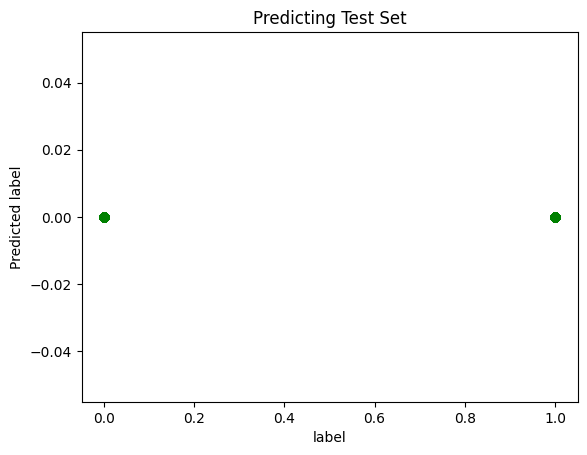

In [165]:
#define the features and target
features = ['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']
target = 'label'

#load the data
X = SVM[features]
Y = SVM[target]

#split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10, test_size=0.2)

#create the SVM classifier model and fit it to the training data
SVM_classifier = SVC(C=1.0, cache_size=1500, verbose=True)
SVM_classifier.fit(X_train, Y_train)

#evaluate the model on the testing data
score = SVM_classifier.score(X_test, Y_test)
print('Model Accuracy: ', score)
print()

#predict the labels of the test set
y_pred = SVM_classifier.predict(X_test)


#calculate the classification report of the model
report = classification_report(Y_test, y_pred)
print('Classification Report:')
print(report)
print()

#calculate the time taken by the model to run
start_time = time.time()

print()

end_time = time.time()

print('Time taken: ', end_time - start_time, 'seconds')

#plot the predicted values
plt.scatter(Y_test, y_pred, color='green')
plt.title('Predicting Test Set')
plt.xlabel(target)
plt.ylabel('Predicted ' + target)
plt.show()




In [163]:
from sklearn.metrics import mean_squared_error, r2_score


# Train the Naive Bayse model

### Read the data

In [42]:
filepath = "iot23_combined.csv"
NP = pd.read_csv(filepath)
NP = pd.read_csv(filepath, nrows=40000)

In [46]:
X = NP[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']]
Y = NP['label']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
normalized_x = scaler.transform(X)
normalized_x

X_train, X_test, Y_train, Y_test = train_test_split(normalized_x, Y, random_state=100, test_size=0.2)

clf = GaussianNB()
clf.fit(X_train, Y_train)

start = time.time()
print('program start...')
print()

clf = GaussianNB().fit(X_train, Y_train)
print()
print(clf.score(X_test, Y_test))
print()

y_pred = clf.fit(X_train, Y_train).predict(X_test)
print(y_pred)
print()

end = time.time()

print(end - start, 'seconds')

print("Classifiction Report :")
print(classification_report(Y_test, y_pred))

program start...


0.948125

['PartOfAHorizontalPortScan' 'PartOfAHorizontalPortScan'
 'PartOfAHorizontalPortScan' ... 'Benign' 'PartOfAHorizontalPortScan'
 'Benign']

0.1618945598602295 seconds
Classifiction Report :
                           precision    recall  f1-score   support

                   Benign       1.00      0.89      0.94      3757
PartOfAHorizontalPortScan       0.91      1.00      0.95      4243

                 accuracy                           0.95      8000
                macro avg       0.95      0.94      0.95      8000
             weighted avg       0.95      0.95      0.95      8000



# Building The Regression Models

## Classification models( Decision Tree & Neural Networks)

### Read the dataframe

In [47]:
filepath = "iot23_combined.csv"
DS = pd.read_csv(filepath)
DS = pd.read_csv(filepath, nrows=40000)

# Train Decision Tree Model

In [55]:

# select features and target variable
features = ['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']
target = 'label'

# split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(DS[features], DS[target], random_state=10, test_size=0.2)

# create Decision Tree classifier and fit the model
dt = DecisionTreeClassifier()
start = time.time()
print('program start...')
print()
dt.fit(X_train, Y_train)
print()

# evaluate the model
print(dt.score(X_test, Y_test))
print()
y_pred = dt.predict(X_test)
print(y_pred)
print()

end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')
print("Classification Report :")
print(classification_report(Y_test, y_pred))



program start...


0.95

['PartOfAHorizontalPortScan' 'Benign' 'PartOfAHorizontalPortScan' ...
 'PartOfAHorizontalPortScan' 'PartOfAHorizontalPortScan'
 'PartOfAHorizontalPortScan']

program end...

time cost: 
0.10580229759216309 seconds
Classification Report :
                           precision    recall  f1-score   support

                   Benign       0.99      0.90      0.95      3822
PartOfAHorizontalPortScan       0.92      0.99      0.95      4178

                 accuracy                           0.95      8000
                macro avg       0.96      0.95      0.95      8000
             weighted avg       0.95      0.95      0.95      8000



# Train CNN  Model

In [56]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input, Dropout, Activation, Dense, MaxPooling2D, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import sklearn
from sklearn.preprocessing import MinMaxScaler

In [63]:
filepath = "iot23_combined.csv"
CNN = pd.read_csv(filepath)


In [64]:
del CNN['Unnamed: 0']

In [80]:
del CNN['id.orig_h']

In [133]:
del CNN['ts']

# Set features

In [134]:
X = CNN[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']].values

# Encode the target variable

In [135]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
CNN['label'] = le.fit_transform(CNN['label'])


In [136]:
CNN['label']

0           2
1           2
2           2
3           2
4           2
           ..
1446616    12
1446617    12
1446618    12
1446619    12
1446620    12
Name: label, Length: 1446621, dtype: int64

In [137]:
#define the features and target
features = ['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']
target = 'label'

#load the data
X = CNN[features]
Y = CNN[target]

In [138]:
Y = pd.get_dummies(CNN['label']).values

In [139]:
X.shape

(1446621, 24)

# Scale the features

In [140]:
scaler = MinMaxScaler()

In [141]:
scaler.fit(X)

MinMaxScaler()

In [142]:
normalized_x = scaler.transform(X)

In [143]:
normalized_x

array([[1.27280578e-05, 5.73121586e-10, 2.97162380e-09, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.31494992e-05, 2.00592555e-08, 9.27146625e-07, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.88979910e-03, 8.63866167e-06, 2.97162380e-09, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.26837029e-05, 5.73121586e-10, 2.97162380e-09, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.26837029e-05, 5.73121586e-10, 2.97162380e-09, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.26837029e-05, 5.73121586e-10, 2.97162380e-09, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [144]:
normalized_x.shape

(1446621, 24)

In [145]:
scaler.fit(Y)

MinMaxScaler()

In [146]:
normalized_y = scaler.transform(Y)

In [147]:
normalized_y

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

# Conficure the archetucture of the CNN Model

### Define the features and target

In [166]:

features = ['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']
target = 'label'

# Load the data
X = CNN[features]
Y = CNN[target]



### Define the CNN model

In [173]:

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(np.unique(Y)), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, epochs=10, validation_split=0.2)

# Evaluate the model on the testing data
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('Test accuracy:', test_acc)

Epoch 1/10
80/80 [==============================] - 1s 8ms/step - loss: 43781.6641 - accuracy: 0.3480 - val_loss: 6.2899 - val_accuracy: 0.7016
Epoch 2/10
80/80 [==============================] - 0s 3ms/step - loss: 17.7411 - accuracy: 0.6238 - val_loss: 3.9174 - val_accuracy: 0.7016
Epoch 3/10
80/80 [==============================] - 0s 3ms/step - loss: 77.4649 - accuracy: 0.6559 - val_loss: 2.5226 - val_accuracy: 0.7016
Epoch 4/10
80/80 [==============================] - 0s 3ms/step - loss: 6.5797 - accuracy: 0.6676 - val_loss: 1.9641 - val_accuracy: 0.7016
Epoch 5/10
80/80 [==============================] - 0s 3ms/step - loss: 4.8945 - accuracy: 0.6746 - val_loss: 1.1783 - val_accuracy: 0.7016
Epoch 6/10
80/80 [==============================] - 0s 3ms/step - loss: 4.7977 - accuracy: 0.6824 - val_loss: 0.8551 - val_accuracy: 0.7016
Epoch 7/10
80/80 [==============================] - 0s 3ms/step - loss: 3.4455 - accuracy: 0.6809 - val_loss: 0.9928 - val_accuracy: 0.7016
Epoch 8/10
80/

In [174]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 64)                1600      
                                                                 
 dropout_24 (Dropout)        (None, 64)                0         
                                                                 
 dense_37 (Dense)            (None, 64)                4160      
                                                                 
 dropout_25 (Dropout)        (None, 64)                0         
                                                                 
 dense_38 (Dense)            (None, 13)                845       
                                                                 
Total params: 6,605
Trainable params: 6,605
Non-trainable params: 0
_________________________________________________________________
